In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('review_shopping.csv', sep='\t', names=['text', 'sentiment'], header=None)
df

,text,sentiment
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg
1,สินค้าด้อยคุณภาพ,neg
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg
...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg


In [3]:
df['sentiment']

0      neg
1      neg
2      neg
3      neg
4      neg
      ... 
123    neg
124    neg
125    neg
126    neg
127    neg
Name: sentiment, Length: 128, dtype: object

In [4]:
df['sentiment'].value_counts()

sentiment
neg    68
pos    60
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

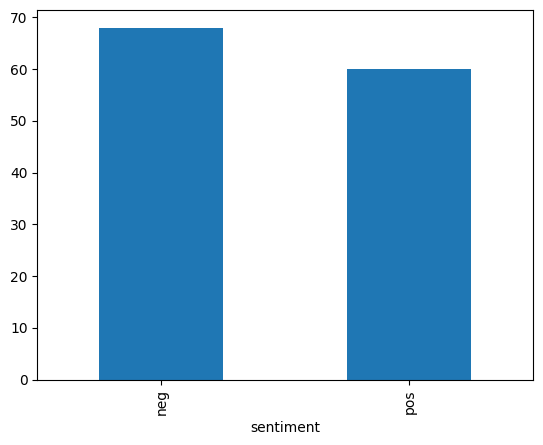

In [5]:
df['sentiment'].value_counts().plot.bar()

In [6]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['พวกแก',
 'สูงส่ง',
 'คราวๆ',
 'ถูกต้อง',
 'ส่วนที่',
 'เป็นเพราะว่า',
 'จ๊ะ',
 'เกือบ',
 'อย่าง',
 'นี่',
 'ด้วยเพราะ',
 'ดั่งกับว่า',
 'อันเนื่องมาจาก',
 'เมื่อใด',
 'กลุ่ม',
 'หลังจาก',
 'จัด',
 'ถือ',
 'บ่อย',
 'เสียด้วย',
 'คงอยู่',
 'พร้อมทั้ง',
 'ขณะนี้',
 'ทุกวัน',
 'จง',
 'อย่างที่',
 'จนแม้น',
 'บ้าง',
 'เกิน',
 'มาก',
 'จวบจน',
 'ถึงจะ',
 'แต่ทว่า',
 'เช่นไร',
 'เนื่องจาก',
 'บาง',
 'ค่อนข้างจะ',
 'เล็กน้อย',
 'อย่างละ',
 'มี',
 'พวกเขา',
 'ใหม่ๆ',
 'นี่เอง',
 'ยาวนาน',
 'วันไหน',
 'ที่ซึ่ง',
 'ใน',
 'ถึงแม้',
 'สิ่งนั้น',
 'ที่แท้จริง',
 'มั้ยนั่น',
 'ทาง',
 'กันดีกว่า',
 'แก',
 'เถิด',
 'จัดการ',
 'อีก',
 'ทุกสิ่ง',
 'นับตั้งแต่',
 'เป็นอันว่า',
 'เปลี่ยน',
 'อันได้แก่',
 'เมื่อวันวาน',
 'รวม',
 'เป็นที่สุด',
 'แต่ก่อน',
 'นำ',
 'สิ้น',
 'คล้ายกันกับ',
 'สั้นๆ',
 'ครั้งกระนั้น',
 'นาย',
 'ขณะใดๆ',
 'ก็ตามแต่',
 'ไม่ใช่',
 'เช่นกัน',
 'เพียงใด',
 'พอสมควร',
 'ล้วนแต่',
 'แสดง',
 'บางที',
 'กลุ่มก้อน',
 'ส่วนใหญ่',
 'ตรง',
 'เป็นเพียง',
 'ยังคง',
 'เหลือ',
 'ด้วยประการฉะนี้

In [7]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ")) #ตัวที่จะตัดทิ้ง
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...
...,...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg,สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ...
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ...
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี...
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10...


In [8]:
from wordcloud import WordCloud
df_pos = df[df['sentiment'] == 'pos']
df_pos

,text,sentiment,text_tokens
10,ยอดเยี่ยมค่ะ ราคาเหมาะสม บอกต่อได้เลยค่ะ,pos,ยอดเยี่ยม ค่ะ ราคา เหมาะสม บอกต่อ ได้ เลย ค่ะ
11,สวยค่ะ เหมือนในรูปเลย ชอบค่ะ ส่งของไวมากก,pos,สวย ค่ะ เหมือน ใน รูป เลย ชอบ ค่ะ ส่ง ของ ไว ม...
12,ใช้ดีค่ะหน้านุ่มและขาวขึ้น,pos,ใช้ ดี ค่ะ หน้า นุ่ม และ ขาว ขึ้น
13,จัดส่งเร็วมาก สะดวกดี ของจริงขนาดใหญ่กว่าที่คิ...,pos,จัดส่ง เร็ว มาก สะดวก ดี ของจริง ขนาดใหญ่ กว่า...
14,ชอบสินค้ามาก ไม่ผิดหวังที่รอ สวยยังบรรจุภัณฑ์คับ,pos,ชอบ สินค้า มาก ไม่ ผิดหวัง ที่ รอ สวย ยัง บรรจ...
15,สินค้าส่งรวดเร็ว พอใจในสินค้าครับ,pos,สิน ค้าส่ง รวดเร็ว พอใจ ใน สินค้า ครับ
16,สินค้าคุณภาพดี แข็งแรง เสียงดี เด็กๆ ชอบ และยั...,pos,สินค้า คุณภาพดี แข็งแรง เสียงดี เด็ก ชอบ และ ย...
17,ราคากับคุณภาพของสินค้ามีความเหมาะสม ใช้งานง่าย,pos,ราคา กับ คุณภาพ ของ สินค้า มี ความเหมาะสม ใช้ง...
18,ส่งของไว ห่อพัสดุดี ของใช้งานเยี่ยม,pos,ส่ง ของ ไว ห่อ พัสดุ ดี ของ ใช้งาน เยี่ยม
19,สวยค่ะ การจัดส่งก็รวดเร็วดีค่ะ,pos,สวย ค่ะ การจัดส่ง ก็ รวดเร็ว ดี ค่ะ


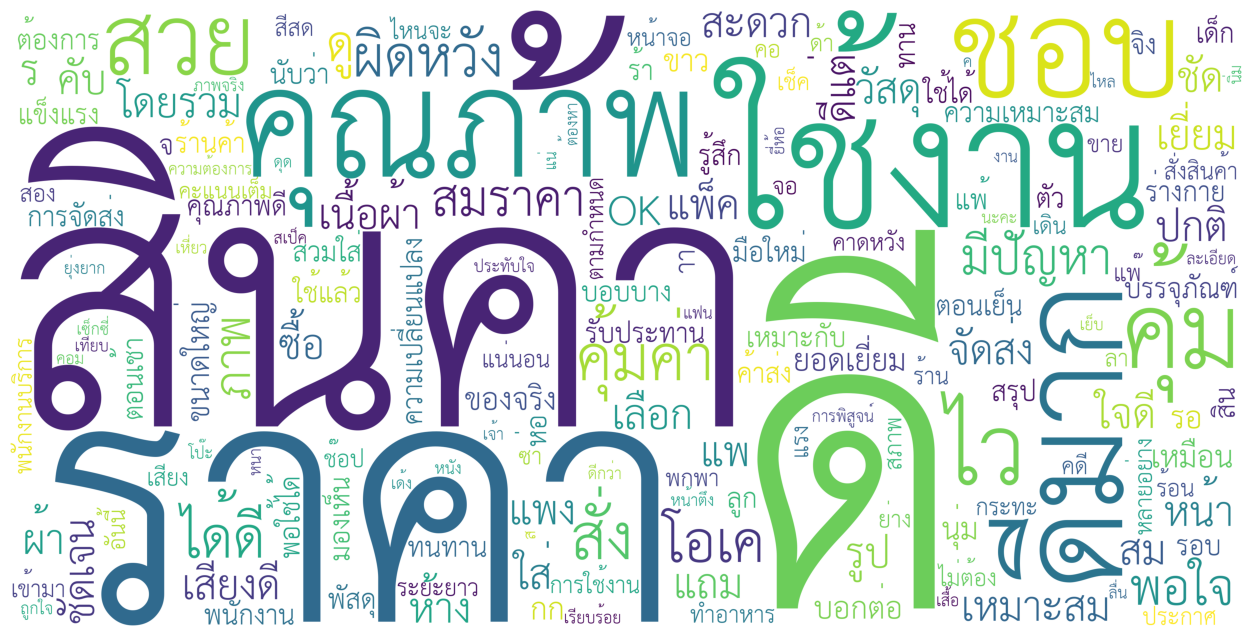

In [9]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

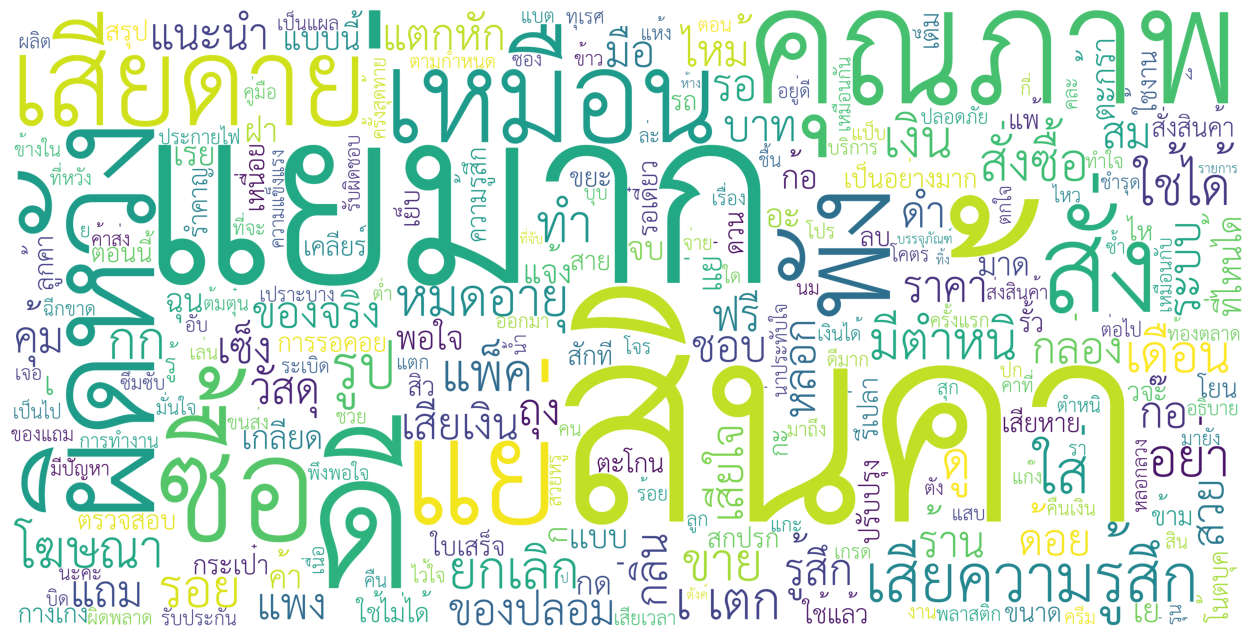

In [10]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'แย่มาก': 337,
 'บิด': 146,
 'น้ำ': 139,
 'ไม่': 367,
 'แห้ง': 341,
 'เสียดาย': 304,
 'ตัง': 99,
 'มาก': 171,
 'อย่า': 257,
 'ทำ': 117,
 'แบบนี้': 329,
 'กับ': 9,
 'ใคร': 349,
 'อีก': 265,
 'นะ': 130,
 'ค่ะ': 59,
 'รับ': 193,
 'ของ': 24,
 'ไว': 370,
 'พนักงาน': 157,
 'ส่ง': 240,
 'ดีมาก': 87,
 'คุณภาพ': 54,
 'คุ้ม': 55,
 'ราคา': 197,
 'ซื้อ': 83,
 'แล้ว': 340,
 'ผิดหวัง': 153,
 'สินค้า': 234,
 'มี': 173,
 'สิน': 233,
 'ค้าส่ง': 61,
 'มา': 170,
 'แตกหัก': 322,
 'ยัง': 179,
 'ได้': 362,
 'ประกอบ': 150,
 'เลย': 299,
 'เสียความรู้สึก': 302,
 'วัสดุ': 215,
 'เหมือน': 312,
 'หมดอายุ': 247,
 'ของปลอม': 26,
 'เนื่อ': 286,
 'ครีม': 40,
 'ซอง': 80,
 '10': 0,
 'บาท': 145,
 'บรรจุภัณฑ์': 140,
 'ก๊อ': 22,
 'ป': 148,
 'ของจริง': 25,
 'ใน': 357,
 'ห้าง': 254,
 'ตังค์': 100,
 'ทิ้ง': 122,
 'สวย': 223,
 'ใช้งาน': 353,
 'ง่าย': 63,
 'ที่': 123,
 'สำคัญ': 232,
 'เร็ว': 298,
 'คะ': 45,
 'แพ๊': 335,
 'คดี': 36,
 'สภาพ': 219,
 'ดี': 85,
 'ถูก': 112,
 'ไม่ต้อง': 369,
 'ไป': 366,
 'เดิน': 278,
 'ช๊อป': 79,
 

In [13]:
train_bow = cvec.transform(X_train['text_tokens'])
train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 962 stored elements and shape (89, 379)>

In [15]:
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])

,10,OK,ก,กก,กด,กระทะ,กลิ่น,กล่อง,กว่า,กับ,...,ไม่ต้อง,ไว,ไว้,ไว้ใจ,ไหนจะ,ไหม้,ไหล,ไหว,☺,😢
text_tokens,,,,,,,,,,,,,,,,,,,,,
แย่มาก บิด น้ำ ไม่ แห้ง เสียดาย ตัง มาก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
รับ ของ ไว พนักงาน ส่ง ของ ดีมาก คุณภาพ คุ้ม ราคา,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ซื้อ แล้ว ผิดหวัง สินค้า ไม่ มี คุณภาพ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สิน ค้าส่ง มา แตกหัก ยัง ไม่ ได้ ประกอบ เลย เสียความรู้สึก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
แย่มาก เสียดาย เงิน,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สินค้า ใช้ ดี สีสด ใช้ จนถึง ทุกวันนี้,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แพ็ค ของ ไม่ ดีมาก เลย ครับ ข้างใน กล่อง ฉีกขาด ไม่ สวย เลย,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.96      0.92      0.94        24
         pos       0.88      0.93      0.90        15

    accuracy                           0.92        39
   macro avg       0.92      0.93      0.92        39
weighted avg       0.93      0.92      0.92        39



In [18]:
my_text = 'ตรงปกส่งไวครับ'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['pos'], dtype=object)

In [19]:
my_text = 'ไม่ตรงปกส่งช้าครับ'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['neg'], dtype=object)

In [21]:
my_text = 'ไม่คนรับของ'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['neg'], dtype=object)